# Binomial partitioning numerics

(c) 2019 Manuel Razo. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT)

---

In [1]:
# Our numerical workhorses
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm

# Import matplotlib stuff for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

# Seaborn, useful for graphics
import seaborn as sns

# Import the project utils
import ccutils

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Set PBoC plotting format
ccutils.viz.set_plotting_style()
# Increase dpi
mpl.rcParams['figure.dpi'] = 110

## Exploring binomial partitioning

One of my ideas for why we could potentially have disagreement between theory and data is that when a cell partitions into two, the two daughter cells are perfectly correlated. This is, if a mother cell with $m'$ molecules divides into two, and one of the daughter cells gets $m \leq m'$ molecules, by definition the other daughter cell must get $m' - m$ molecules. 

What I want to explore in this notebook is if this could represent a problem for the way we compute the distribution moments after cell division. I have tried approaching this question analytically, but it is quite challenging. So In this notebook I will tackle the question numerically then.

The idea is pretty simple. I will generate a certain number of binomial samples given $N$ trials. For one case I will only keep the number $n$ that the random number generator gives, and for the other case I will keep both $n$ and $N - n$ and see if the final distributions are different.

In [30]:
# Set random seed
np.random.seed(42)

# Define number of "cells" to simulate
n_sim = 300
# Define partition probability
p = 0.5
# Define number of trials
N = 1000

# Generate binomial samples
n = np.random.binomial(N, p, n_sim)
# Generate "correlated" binomial samples
n_corr = np.zeros(n_sim)
n_corr[0:int(n_sim/2)] = np.random.binomial(N, p, int(n_sim / 2))
n_corr[int(n_sim/2)::] = N - n_corr[0:int(n_sim/2)]

print(f'mean uncorrelated: {np.mean(n)}' )
print(f'mean correlated: {np.mean(n_corr)}' )

print(f'std uncorrelated: {np.std(n)}' )
print(f'std correlated: {np.std(n_corr)}' )

print(f'noise uncorrelated: {np.std(n) / np.mean(n)}' )
print(f'noise correlated: {np.std(n_corr) / np.mean(n_corr)}' )

mean uncorrelated: 499.49666666666667
mean correlated: 500.0
std uncorrelated: 16.101448865103897
std correlated: 16.060510577189007
noise uncorrelated: 0.03223534798050817
noise correlated: 0.03212102115437801


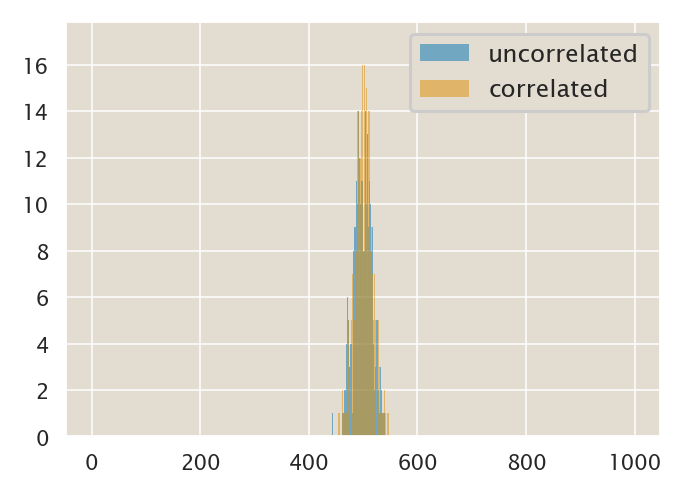

In [10]:
plt.hist(n, bins=range(N), label='uncorrelated', 
         linewidth=0, alpha=0.5)
plt.hist(n_corr, bins=range(N), label='correlated', 
         linewidth=0, alpha=0.5)
plt.legend();

In [11]:
print(f'mean uncorrelated: {np.mean(n)}' )
print(f'mean correlated: {np.mean(n_corr)}' )

print(f'std uncorrelated: {np.std(n)}' )
print(f'std correlated: {np.std(n_corr)}' )

mean uncorrelated: 498.86
mean correlated: 500.0
std uncorrelated: 16.21037939099514
std correlated: 15.660779035539706
